# Election poll simulation

Previous to elections very often polls are conducted to predict the outcome of the elections.
The polls are conducted by asking a sample of people who they would vote for.
Selection bias can  distort the results of the polls, but even without selection bias
the limited sample size leads to deviation of the poll results.
This example demonstrates how to use randify to simulate the outcome of an election poll
and visualize the dstribution of the poll results.
The election poll is assumed to have no selection bias, so all deviations are due to the limited sample size.

In [18]:
import numpy as np
from randify import randify, RandomVariable,  plot_pdf

# typical sample size
N = 1000

At first we define the true distribution of votes in the whole population. This is the outcome of the vote if every voter went to vote.

In [19]:
true_results = {
    "party_A": 0.55,
    "party_B": 0.25,
    "party_C": 0.05,
    "others" : 0.15
}

Now we write a function that simulates an election poll. We add the randify operator to get the poll results not as a single sample like in the reality but as a probability distribution.

In [20]:
@randify(verbose=True, duration=10) # run randify for approximately 5 seconds
def election_poll(true_results, N):
    poll_results = true_results.copy()
    sample_results = np.random.choice(list(true_results.keys()), p=list(true_results.values()), size=(N,))
    for party in poll_results.keys():
        poll_results[party] = np.sum(sample_results == party) / N
    return poll_results

Now we simulate the election polls with randify. The result is a RandomVariable holding the election poll results as dictionary. We extract the percentages for all the parties to seperate RandomVariables and visualize the results using randify's plot_pdf() function. Note that the inputs to the randified function don't need to be random variables.

Randify: 6516 samples evaluated in 0.916s.


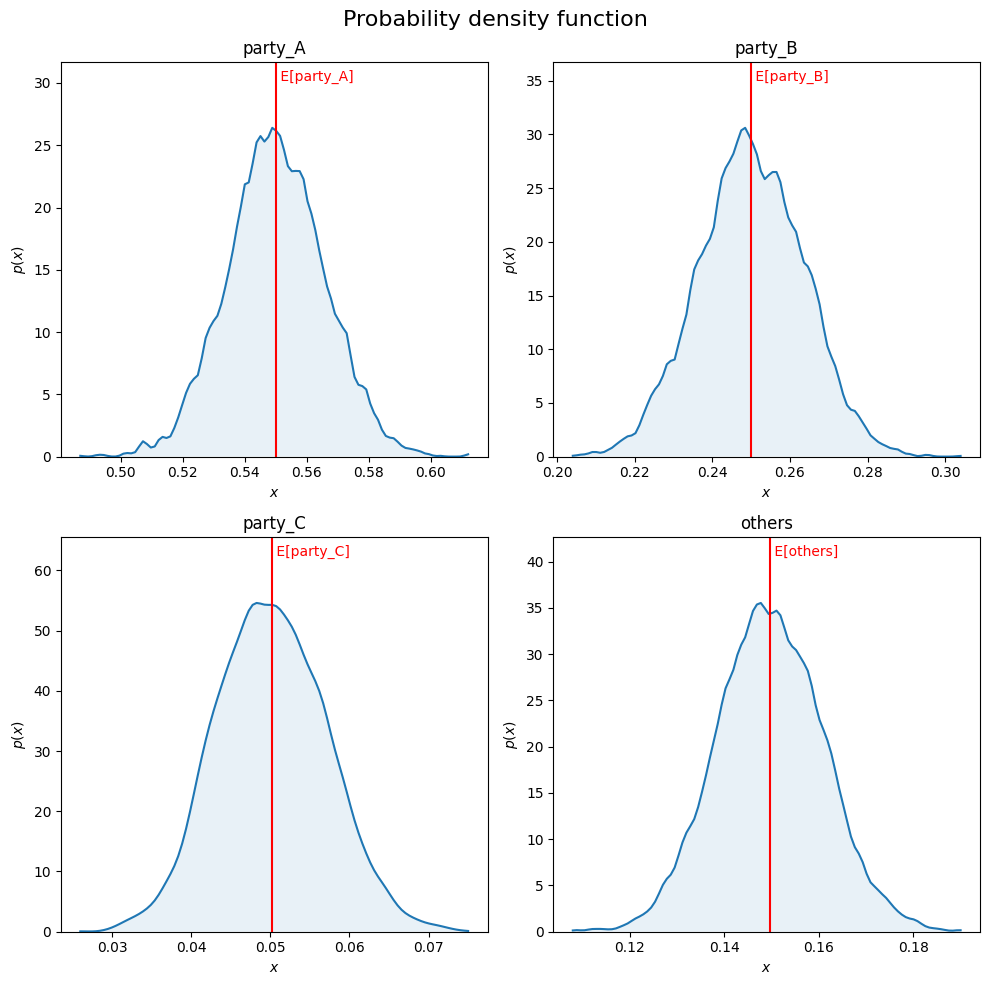

In [21]:
poll_results = election_poll(true_results, N)

party_A_percentage = poll_results["party_A"]
party_B_percentage = poll_results["party_B"]
party_C_percentage = poll_results["party_C"]
others_percentage = poll_results["others"]

plot_pdf(party_A=party_A_percentage,
         party_B=party_B_percentage,
         party_C=party_C_percentage,
         others=others_percentage)

We can see the resulting distributions are roughly normally distributed, but look wobbly due to the limited number of samples the Monte-Carlo simulation of randify uses. You can play around with the duration parameter of the randify-decorator. It let's you decide how many seconds the simulation should roughly take. The more time you allow the more accurate the results will be.

You can also let randify calculate statistical measures. Let's print the standard devitations for all parties.

In [22]:
print("Standard deviation of polls result for Party A: {:.2f}%".format(np.sqrt(party_A_percentage.variance)*100))
print("Standard deviation of polls result for Party B: {:.2f}%".format(np.sqrt(party_B_percentage.variance)*100))
print("Standard deviation of polls result for Party C: {:.2f}%".format(np.sqrt(party_C_percentage.variance)*100))
print("Standard deviation of polls result for Others: {:.2f}%".format(np.sqrt(others_percentage.variance)*100))

Standard deviation of polls result for Party A: 1.57%
Standard deviation of polls result for Party B: 1.35%
Standard deviation of polls result for Party C: 0.69%
Standard deviation of polls result for Others: 1.13%


The results show significant standard deviations for a sample size of 1000 asked poll participants. These deviations can solely be attributed to the limited the sample size. Selection bias can further introduce errors, e.g. when the poll is conducted via internet, as people not using the internet regularly will be underrepresented.